In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# XGBoost Classifications

In [3]:
df = pd.read_csv('Data/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=23)

In [8]:
xgb_clf = xgb.XGBClassifier()

In [9]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [10]:
ypred = xgb_clf.predict(X_test)

In [11]:
accuracy_score(y_test,ypred)

0.8709677419354839

In [12]:
xgb_clf.feature_importances_

array([0.03996253, 0.06777523, 0.22616358, 0.03528278, 0.02579554,
       0.08436673, 0.03305577, 0.0301207 , 0.12792872, 0.05120651,
       0.05711711, 0.0942574 , 0.1269674 ], dtype=float32)

In [14]:
xgb_clf.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='<U8')

In [20]:
import matplotlib.pyplot as plt

(array([5., 2., 2., 1., 0., 2., 0., 0., 0., 1.]),
 array([0.02579554, 0.04583235, 0.06586915, 0.08590595, 0.10594276,
        0.12597956, 0.14601636, 0.16605318, 0.18608998, 0.20612678,
        0.22616358]),
 <BarContainer object of 10 artists>)

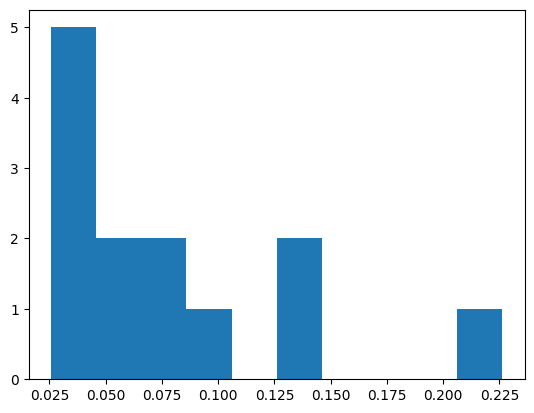

In [21]:
plt.hist(xgb_clf.feature_importances_)

# XGBoost Regression

In [22]:
data = pd.read_csv('Data/breast_cancer.csv')

In [23]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
newData = data.drop(columns=["id",'Unnamed: 32'])

In [25]:
newData.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
from sklearn.preprocessing import LabelEncoder

In [32]:
X = newData.iloc[:,1:-1]
Y = newData.iloc[:,0]

In [33]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [34]:
Y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [43]:
Y = LabelEncoder().fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

In [55]:
xgb_regressor = xgb.XGBRegressor()

In [56]:
xgb_regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pred = xgb_regressor.predict(X_test)

In [58]:
from sklearn.metrics import r2_score,mean_squared_error

In [59]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 Score:  0.8121471405029297
MSE:  0.03931669290183113


In [60]:
xgb_regressor.feature_importances_

array([2.17935140e-03, 2.89507918e-02, 9.33923802e-05, 2.03321950e-04,
       1.19314790e-02, 5.11758588e-03, 9.55455471e-03, 5.31986654e-01,
       1.82023781e-04, 1.03812185e-04, 1.41095938e-02, 4.59135417e-03,
       2.34099966e-03, 5.72000723e-03, 5.70645032e-04, 3.19103419e-04,
       1.53328432e-02, 3.32266837e-02, 4.78105812e-06, 1.86461490e-03,
       1.03321709e-01, 1.84785016e-02, 8.95676091e-02, 2.21463051e-02,
       9.99846216e-03, 2.69967968e-05, 3.95366438e-02, 4.60284874e-02,
       2.51163379e-03], dtype=float32)

In [61]:
xgb_regressor.feature_names_in_

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'], dtype='<U22')

(array([26.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4.78105812e-06, 5.32029681e-02, 1.06401153e-01, 1.59599349e-01,
        2.12797537e-01, 2.65995711e-01, 3.19193900e-01, 3.72392088e-01,
        4.25590277e-01, 4.78788465e-01, 5.31986654e-01]),
 <BarContainer object of 10 artists>)

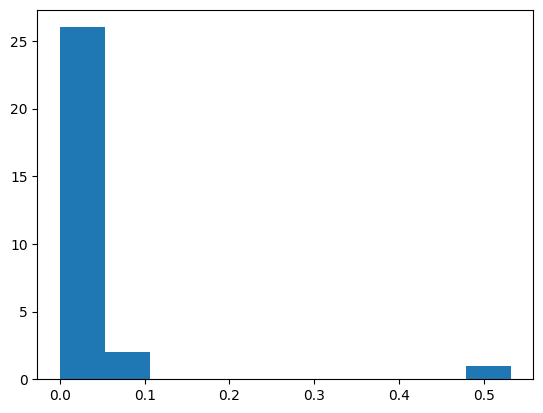

In [62]:
plt.hist(xgb_regressor.feature_importances_)

In [69]:
xgb_regressor.predict(X_test)

array([ 2.0000029e-03,  9.9853337e-01,  1.0014853e+00, -1.3734347e-03,
       -3.7923135e-04,  1.0000165e+00,  9.9817085e-01,  4.7113129e-01,
        5.3850502e-01,  5.6790462e-04,  1.1529578e-02,  9.6556646e-01,
       -5.4587582e-03,  7.5385946e-01, -6.6581625e-03,  9.9897742e-01,
        2.4019211e-04, -1.5587390e-03,  8.9272723e-04,  9.9917954e-01,
        1.6863917e-01, -1.1807078e-03,  1.0008564e+00, -4.1090739e-03,
       -1.0263528e-03, -4.9445941e-03,  1.9196213e-03,  6.2283166e-02,
       -1.9608892e-03,  1.0001935e+00, -2.3331507e-03,  1.1796155e-03,
        6.7123854e-01,  4.4250350e-02, -5.8453472e-04,  5.3052885e-05,
        9.9122524e-01,  1.4737153e-02,  9.9877506e-01,  1.2146124e-02,
       -5.7760248e-04,  9.9304718e-01, -6.9333296e-03,  2.1179581e-04,
        8.3503015e-02,  8.8986075e-03,  5.4300827e-01, -1.3060707e-02,
        1.4483655e-03, -5.1690789e-04,  1.0215777e+00,  1.0023909e+00,
        3.6472464e-01,  1.9779896e-02, -6.0621469e-04,  1.5850182e-01,
      

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)